In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
crops = ['Corn', 'Soybean', "Wheat", "Rice"]
phases = [1,2]

In [31]:
# Read in the region_yield_reduction
crop_yield_reduction = pd.read_excel(".." + os.sep + "reports" + os.sep + "Prediction_statistics.xlsx", sheet_name = "Prediction_statistics")
# Only keep the first three columns
crop_yield_reduction = crop_yield_reduction.iloc[:,0:3]
# Rename the columns
crop_yield_reduction.columns = ["Crop", "Phase", 'Yield Reduction (%)']
# Forwardfill the crop column
crop_yield_reduction['Crop'] = crop_yield_reduction['Crop'].fillna(method = 'ffill')
# Only keep the rows with RelativeChange_phase1 and Relative_Change_phase2 in column Unnamed: 1
crop_yield_reduction = crop_yield_reduction[crop_yield_reduction["Phase"].isin(["RelativeChange_phase1", "Relative_Change_phase2"])]
# Only keep the numbers from the phase column
crop_yield_reduction["Phase"] = crop_yield_reduction["Phase"].str.extract('(\d+)', expand=False)
# Multiply the yield reduction by 100
crop_yield_reduction["Yield Reduction (%)"] = crop_yield_reduction["Yield Reduction (%)"] * 100
crop_yield_reduction


,Crop,Phase,Yield Reduction (%)
4,Corn,1,-30.0
5,Corn,2,-48.0
10,Rice,1,-32.0
11,Rice,2,-35.0
16,Soybean,1,-15.0
17,Soybean,2,-41.0
22,Wheat,1,-37.0
23,Wheat,2,-48.0


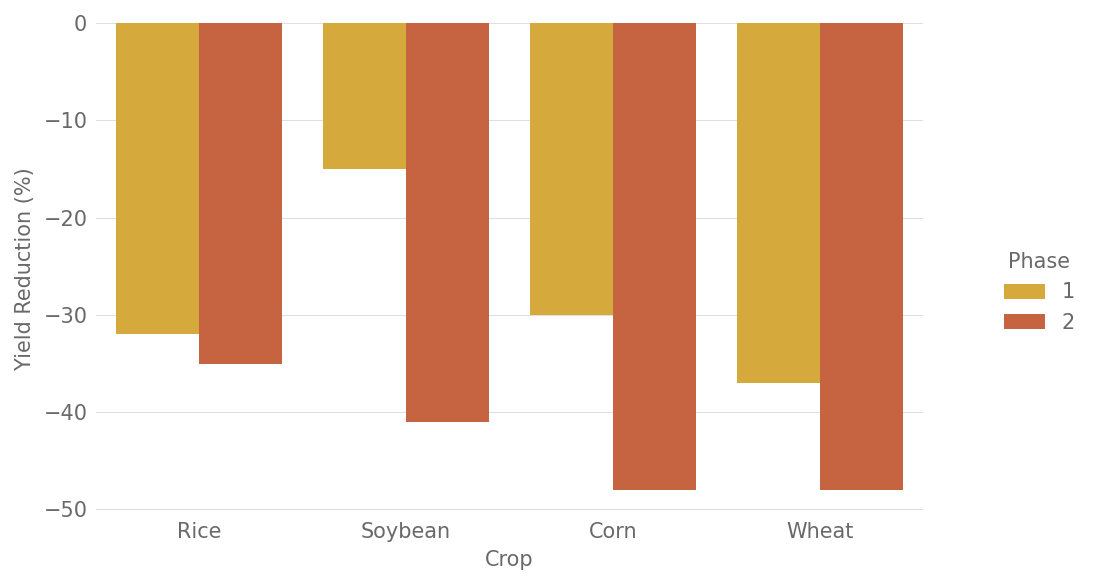

In [33]:
plt.style.use("https://raw.githubusercontent.com/allfed/ALLFED-matplotlib-style-sheet/main/ALLFED.mplstyle")
# Set up the figure and subplots
g = sns.catplot(
        data=crop_yield_reduction,
        x='Crop',
        y='Yield Reduction (%)',
        hue='Phase',
        kind='bar',
        height=4,
        palette= ['#F0B323' ,'#DC582A'],
        order=["Rice", "Soybean", "Corn", "Wheat"],
    )

for ax in g.axes.flat:
    # Hide borders
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)

fig = plt.gcf()
fig.set_size_inches(8, 4)

# Show the plot
plt.savefig("../" + os.sep + "reports" + os.sep + "figures" + os.sep + "yield_reduction_by_crop.png", dpi=300, bbox_inches='tight')